In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [60]:
# Import dataset
df = pd.read_csv("Microsoft_malware_dataset_min.csv")

In [61]:
df.head()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18


In [62]:
df['Census_OSEdition'].value_counts()

Census_OSEdition
Core                      38727
Professional              35186
CoreSingleLanguage        21886
CoreCountrySpecific        1862
ProfessionalEducation       623
Education                   442
Enterprise                  404
ProfessionalN               334
EnterpriseS                 252
ServerStandard              107
Cloud                        64
CoreN                        56
ServerStandardEval           18
EducationN                   11
ServerDatacenterEval          9
EnterpriseSN                  7
ServerSolution                5
EnterpriseN                   5
ProfessionalEducationN        2
Name: count, dtype: int64

In [63]:
df['OsPlatformSubRelease'].value_counts()

OsPlatformSubRelease
rs4           43955
rs3           27909
rs2            8903
rs1            8157
th2            4600
th1            2999
windows8.1     2139
windows7       1103
prers5          235
Name: count, dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


In [65]:
df.describe()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,CountryIdentifier
count,100000.000000,96585.000000,99815.000000,100000.000000,98924.000000,94068.000000,99609.000000,100000.000000
mean,0.499280,0.281607,0.006642,0.075850,0.977326,0.000351,0.944864,108.188050
std,0.500002,0.449785,0.081230,0.264759,0.148863,0.018727,0.228246,62.989406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,51.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,97.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,162.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,222.000000


In [66]:
df.isnull().sum()

HasDetections                    0
Wdft_IsGamer                  3415
Census_IsVirtualDevice         185
Census_OSEdition                 0
Census_HasOpticalDiskDrive       0
Firewall                      1076
SMode                         5932
IsProtected                    391
OsPlatformSubRelease             0
CountryIdentifier                0
dtype: int64

In [67]:
# Fill numeric columns with median and categorical columns with mode
for col in df.select_dtypes(include=["float", "int"]).columns:
    df[col].fillna(df[col].median(), inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                100000 non-null  float64
 2   Census_IsVirtualDevice      100000 non-null  float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    100000 non-null  float64
 6   SMode                       100000 non-null  float64
 7   IsProtected                 100000 non-null  float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


In [69]:
df.isnull().sum()

HasDetections                 0
Wdft_IsGamer                  0
Census_IsVirtualDevice        0
Census_OSEdition              0
Census_HasOpticalDiskDrive    0
Firewall                      0
SMode                         0
IsProtected                   0
OsPlatformSubRelease          0
CountryIdentifier             0
dtype: int64

In [70]:
# Check for duplicates 

duplicates = df[df.duplicated()]

# Display duplicates, if any
if not duplicates.empty:
    print(f"Number of duplicate rows: {duplicates.shape[0]}")
    print(duplicates)
else:
    print("No duplicates found.")

Number of duplicate rows: 83886
       HasDetections  Wdft_IsGamer  Census_IsVirtualDevice  \
105                0           0.0                     0.0   
122                0           0.0                     0.0   
145                0           0.0                     0.0   
147                0           0.0                     0.0   
152                0           0.0                     0.0   
...              ...           ...                     ...   
99995              0           0.0                     0.0   
99996              1           0.0                     0.0   
99997              0           0.0                     0.0   
99998              0           0.0                     0.0   
99999              0           0.0                     0.0   

          Census_OSEdition  Census_HasOpticalDiskDrive  Firewall  SMode  \
105    CoreCountrySpecific                           0       1.0    0.0   
122     CoreSingleLanguage                           0       1.0    0.0  

In [71]:
# Remove Duplicates
df = df.drop_duplicates() 

In [72]:
duplicates = df[df.duplicated()]

# Display duplicates, if any
if not duplicates.empty:
    print(f"Number of duplicate rows: {duplicates.shape[0]}")
    print(duplicates)
else:
    print("No duplicates found.")

No duplicates found.


In [73]:
# Handle Outliers (Example using IQR)
for col in df.select_dtypes(include=["float", "int"]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

In [74]:
# Encode Categorical Features
df = pd.get_dummies(df, columns=['Census_OSEdition'], prefix='OSEdition')
df = pd.get_dummies(df, columns =['OsPlatformSubRelease'], prefix= 'OsSubRelease' )

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8412 entries, 0 to 99962
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HasDetections                     8412 non-null   int64  
 1   Wdft_IsGamer                      8412 non-null   float64
 2   Census_IsVirtualDevice            8412 non-null   float64
 3   Census_HasOpticalDiskDrive        8412 non-null   int64  
 4   Firewall                          8412 non-null   float64
 5   SMode                             8412 non-null   float64
 6   IsProtected                       8412 non-null   float64
 7   CountryIdentifier                 8412 non-null   int64  
 8   OSEdition_Cloud                   8412 non-null   bool   
 9   OSEdition_Core                    8412 non-null   bool   
 10  OSEdition_CoreCountrySpecific     8412 non-null   bool   
 11  OSEdition_CoreN                   8412 non-null   bool   
 12  OSEdition_

In [76]:
# Separate the target variable
y = df['HasDetections']

# Select relevant feature columns for modeling
X = df[
    [ 
        'Census_IsVirtualDevice',
        'Firewall', 
        'SMode',
        'IsProtected'
    ] + [col for col in df.columns if col.startswith('OSEdition_')] ]

# Display shapes to verify
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (8412, 22)
y shape: (8412,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming dataset_clustering contains the features you want to scale
scaler = StandardScaler()

# Fit the scaler and transform the data
scaled_data = scaler.fit_transform(X)

# If you want to add the scaled data back to the original DataFrame:
dataset_clustering_scaled = pd.DataFrame(scaled_data, columns=dataset_clustering.columns)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

In [21]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

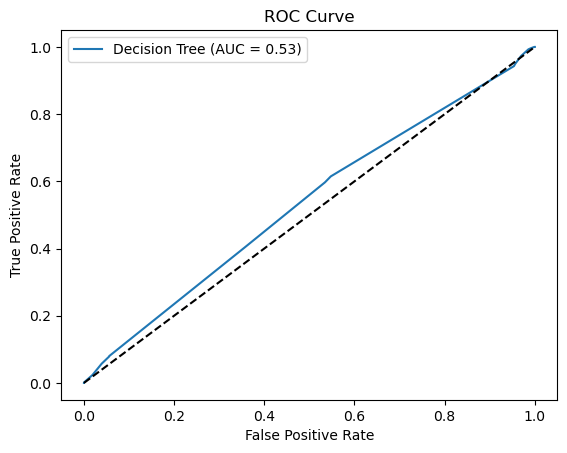

In [24]:
# Model Evaluation and ROC Curve
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

In [25]:
# Hyperparameter Tuning 
dt_model_tuned = DecisionTreeClassifier(max_depth=5, min_samples_split=10)
dt_model_tuned.fit(X_train, y_train)
y_pred_proba_tuned = dt_model_tuned.predict_proba(X_test)[:, 1]
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)
print(f"Tuned Model AUC: {roc_auc_tuned:.2f}")

Tuned Model AUC: 0.51


### Unsupervised Learning

In [26]:
# Drop the target column
dataset_clustering = df.drop("HasDetections", axis=1)

In [27]:
# Apply K-Means Clustering

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

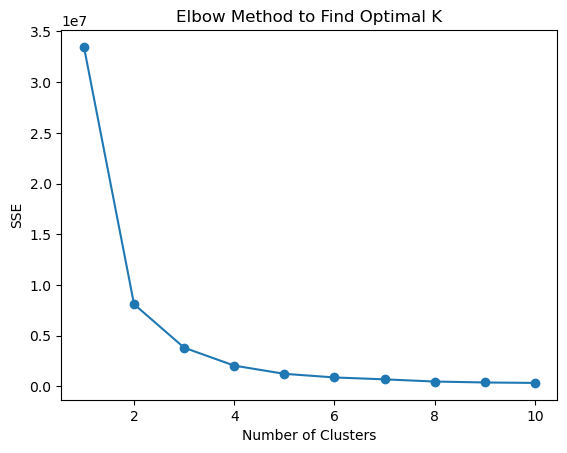

In [28]:
# Determine optimal K using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset_clustering)
    sse.append(kmeans.inertia_)

%matplotlib inline
plt.figure()
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method to Find Optimal K")
plt.show()

In [39]:
# Using elbow method, k = 2

optimal_k = 2
kmeans = KMeans(n_clusters=2, random_state=42)
dataset_clustering["Cluster"] = kmeans.fit_predict(dataset_clustering)

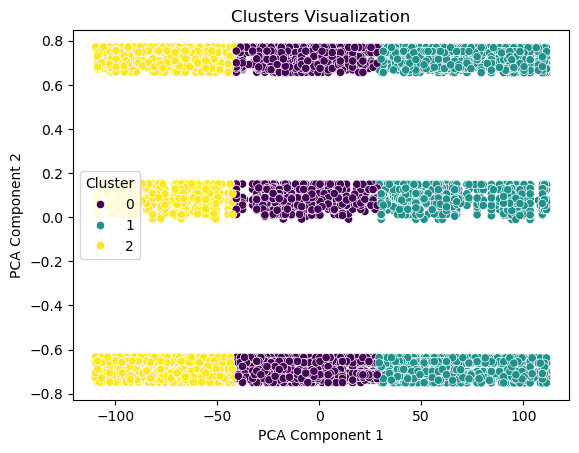

In [36]:
# PCA for Visualization (optional, if dataset is high-dimensional)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dataset_clustering.drop("Cluster", axis=1))

%matplotlib inline
plt.figure()
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=dataset_clustering["Cluster"], palette="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters Visualization")
plt.show()

In [38]:
#Calculating Silhouette Score to evaluate the model

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Fit K-means model
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)  
labels = kmeans.fit_predict(dataset_clustering)

# Calculate Silhouette Score
sil_score = silhouette_score(dataset_clustering, labels)
print(f'Silhouette Score for K-means clustering with k={2}: {sil_score}')


Silhouette Score for K-means clustering with k=2: 0.6395936992014429
